In [5]:
import numpy as np
from math import pi
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from scipy.constants import c

In [2]:
nH = 1e-9
pF = 1e-12
MHz = 1e6

In [42]:
L = 10*nH
C = 18.8*pF
Z0 = 50 #Ohms
Cc = 0.3225*pF
w0 = 1/(L*C)**0.5
Qi = 1e4
f = np.linspace(365, 366, 100000)*MHz
w = 2*pi*f
R = Qi/w0/C
f0 = w0/2/pi
eps_r = 6.739
beta = 2*pi*f*eps_r**0.5/c
Zc = 30
Zin = 18
Zout = 98
l = 22e-3

In [43]:
Zr = (1j*w*R*L)/(1j*w*L + R*(1 - w**2*L*C)) 
Zs = Zr + 2/(1j*w*Cc)
S21_res = (2*Zs)/(2*Zs + Z0)

In [44]:
S21_feed = 2*Z0*Zc/(2*Z0*Zc*np.cos(beta*l) + 1j*(Zc**2 + Z0**2)*np.sin(beta*l))
S21_in = 2*Z0*Zin/(2*Z0*Zin*np.cos(beta*l) + 1j*(Zin**2 + Z0**2)*np.sin(beta*l))
S21_out = 2*Z0*Zout/(2*Z0*Zout*np.cos(beta*l) + 1j*(Zout**2 + Z0**2)*np.sin(beta*l))

In [45]:
S21 = S21_feed * S21_res * S21_feed
S21_mis = S21_in * S21_res * S21_out

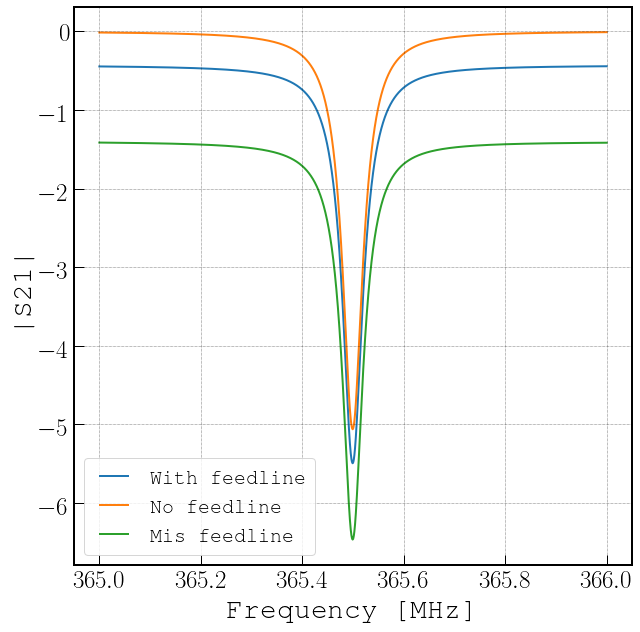

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(f/MHz, 20*np.log10(np.abs(S21)), label='With feedline')
ax.plot(f/MHz, 20*np.log10(np.abs(S21_res)), label='No feedline')
ax.plot(f/MHz, 20*np.log10(np.abs(S21_mis)), label='Mis feedline')
# ax.set_xlim(200, 400)
ymin, ymax = ax.get_ylim()
ax.legend(loc='lower left')
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('|S21|');